In [157]:
# Import packages and libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from scipy import stats

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import pickle

In [158]:
#Display all columns
pd.set_option('display.max_columns', None)

In [159]:
#read the file
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

Column Name  |Description |
-----|:-----|
ID|Trip identification number|
VendorID|A code indicating the TPEP provider that provide the record.|
tpep_pickup_datetime|The date and time when the meter was engaged.|
tpep_dropoff_datetime|The date and time when the meter was disengaged.|
Passenger_count|The number of passenger in the vehicle (This is a driver-entered value)|
Trip_distance|The elapsed trip distance in miles reported by the taximeter (milles)|
PULocationID|TLC Taxi Zone in which the taximeter was engaged.|
DOLocationID|TLC Taxi Zone in which the taximeter was disengaged.|
RateCodeID|The final rate code in effect at the end of the trip.|
Store_and_fwd_flag|This flag indicates whether the trip record was held in vehicle memory before sent to the vendor because the vehicle did not have a connection to the server.|
Payment_type|A numeric code signifying how the passenger paid for the trip.|
Fare_amount|The time-and-distance fare calculated by the meter.|
Extra|Miscellaneous extras and surcharges. Currently this only include the $\$0.50$ and $\$1$ rush hour and overnight charges.|
MTA_tax|$\$0.50$ MTA tax that is automatically triggered based on the metered rate in use.| 
Improvement_surcharge|$\$0.30 $ improvement surcharge assessed trips and the flag drop. The improvement surcharge began being levied in 2015.|
Tip_amount|Tip amount - This field is automatically populated for credit card tips. Cash tips are not included.|
Tolls_amount|Total amount of all tolls paid in trips.|
Total_amount|The total amount charged to passengers. Does not include chas tips.|

In [160]:
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [161]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [162]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [163]:
#Check missing values
df0.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [164]:
#Check for duplicates
df0.duplicated().sum()

0

### Convert pickup & dropoff columns to datetime

In [165]:
#check the format
df0['tpep_pickup_datetime'][0]

'03/25/2017 8:55:43 AM'

In [166]:
#Convert datetime columns to datetime format
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format = '%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format = '%m/%d/%Y %I:%M:%S %p')

In [167]:
#Check the format 
print('Data type of tpep_pickup_datetime:', df0['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df0['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


### Create duration column

In [168]:
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [169]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Outliers

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`


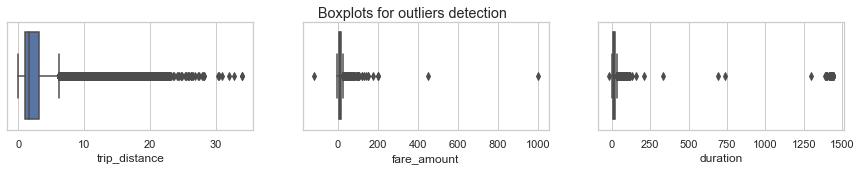

In [170]:
fig, axes = plt.subplots(1,3,figsize = (15,2))
plt.suptitle('Boxplots for outliers detection')
sns.boxplot(ax = axes[0], x = df0['trip_distance'])
sns.boxplot(ax = axes[1], x = df0['fare_amount'])
sns.boxplot(ax = axes[2], x = df0['duration']);

#### `trip_distance` outliers

In [171]:
df0['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

In [172]:
df0[df0['trip_distance'] > 30]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20,63.500000
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,67.483333
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30,39.216667
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80,37.900000
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31,87.800000


In [173]:
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [174]:
print(sum(df0['trip_distance'] == 0))
print('Percentage of trips with a duration of 0 miles:', round((148/22699)*100, 2),'%')

148
Percentage of trips with a duration of 0 miles: 0.65 %


El porcentaje es tan bajo que no va a afectar a ningún modelo o predicción que hagamos por lo que podemos dejar esas filas o borrarlas. En nuestro caso vamos a dejarlas.

#### `fare_amount` outliers

In [175]:
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [176]:
#Change the values less than $0 with 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [177]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

In [178]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers

In [179]:
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [180]:
df0.loc[df0['duration'] < 0, 'duration'] = 0
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



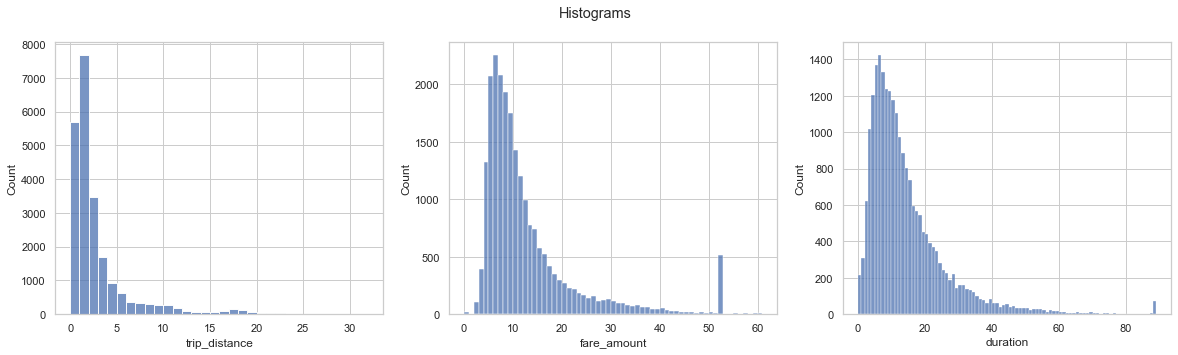

In [181]:
fig, axes = plt.subplots(1,3,figsize = (20,5))
plt.suptitle('Histograms')
sns.histplot(ax = axes[0], x = df0['trip_distance'], bins = range(0,33,1))
sns.histplot(ax = axes[1], x = df0['fare_amount'], bins = range(0, 62, 1))
sns.histplot(ax = axes[2], x = df0['duration'], bins = range(0,90,1));

### Tip study

In [182]:
df0['tip_amount'].describe()

count    22699.000000
mean         1.835781
std          2.800626
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max        200.000000
Name: tip_amount, dtype: float64

In [183]:
sorted(set(df0['tip_amount']), reverse = True)[:10]

[200.0, 55.5, 51.64, 46.69, 42.29, 28.0, 25.2, 25.0, 22.22, 21.3]

In [184]:
df0[df0['tip_amount'] == 200]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.6,5,N,226,226,1,62.5,0.0,0.0,200.0,0.0,0.3,1200.29,0.966667


In [185]:
df0.drop(df0[(df0['tip_amount'] == 200)].index, inplace=True)

In [186]:
df0['tip_amount'].describe()

count    22698.000000
mean         1.827051
std          2.472576
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max         55.500000
Name: tip_amount, dtype: float64

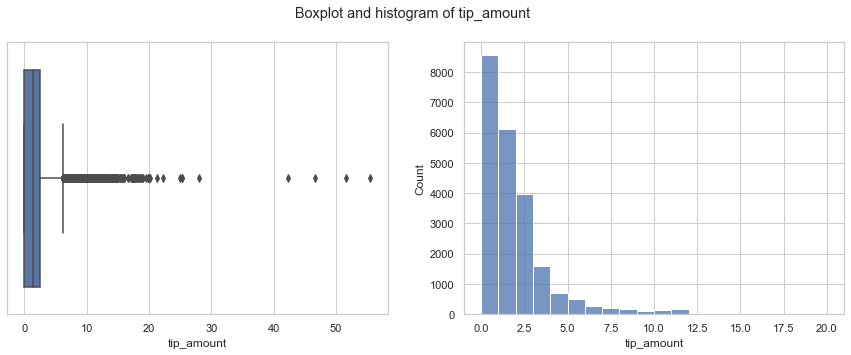

In [187]:
fig, axes = plt.subplots(1,2, figsize =(15,5))
plt.suptitle('Boxplot and histogram of tip_amount')
sns.boxplot(ax = axes[0], x = df0['tip_amount'])
sns.histplot(ax = axes[1], x = df0['tip_amount'], bins = range(0,21,1));

#### tip amount by vendor

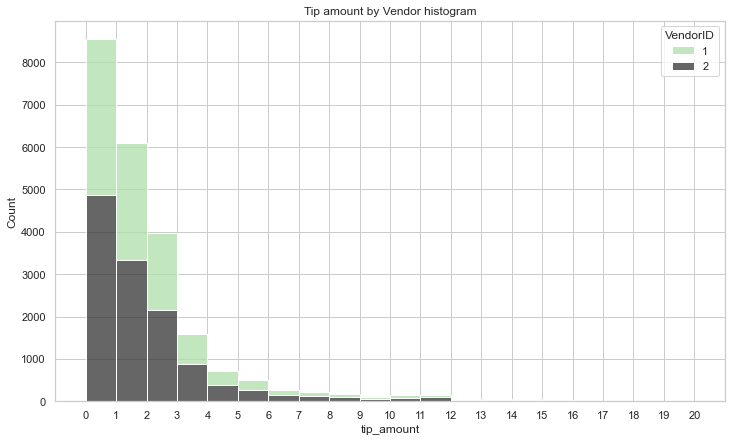

In [188]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df0, x = 'tip_amount',bins = range(0,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                 palette = 'Greens_d')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by Vendor histogram');

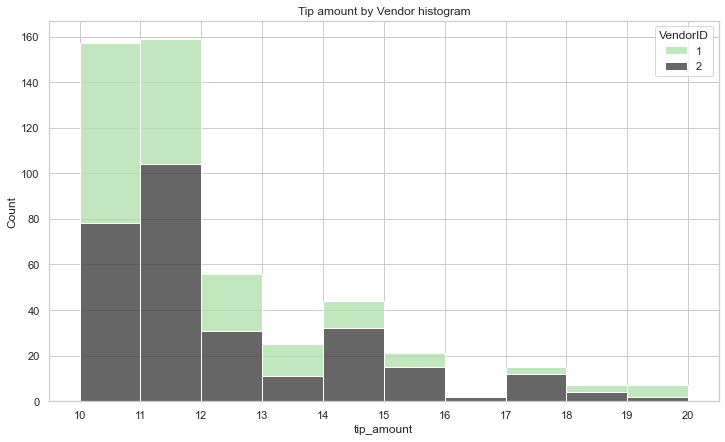

In [189]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df0, x = 'tip_amount',bins = range(10,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                 palette = 'Greens_d')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by Vendor histogram');

In [190]:
df0['passenger_count'].value_counts()

1    16116
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [191]:
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.836625
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


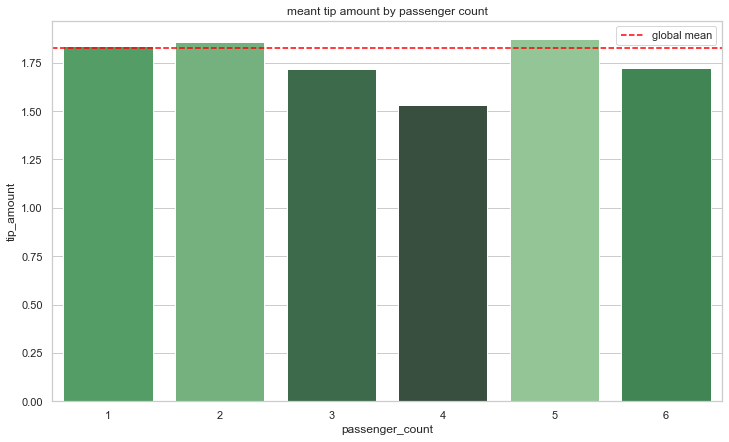

In [192]:
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize =(12,7))
ax = sns.barplot(x = data.index, y = data['tip_amount'],
                palette = np.array(pal[::-1])[rank])
ax.axhline(df0['tip_amount'].mean(), ls = '--', color = 'red', label = 'global mean')
ax.legend()
plt.title('meant tip amount by passenger count');

#### Rides per month

In [193]:
#Create a month column
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()
#Create a day column
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

In [194]:
#Get the total number of rides for each month
monthly_rides = df0['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1768
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [195]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

January      1997
February     1768
March        2049
April        2019
May          2013
June         1964
July         1697
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

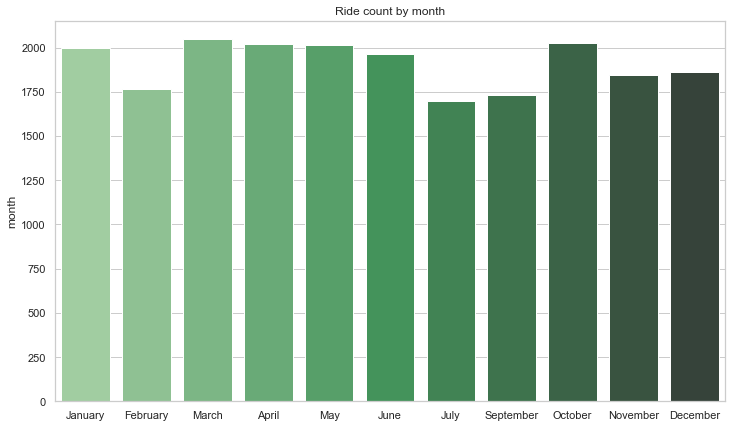

In [196]:
#Create a bar plot of total rides per month
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(monthly_rides))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides, palette = pal)
ax.set_xticklabels(month_order)
plt.title('Ride count by month');

#### Rides per day

In [197]:
#Repeat the process, this time for days
daily_rides = df0['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

Monday       2930
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

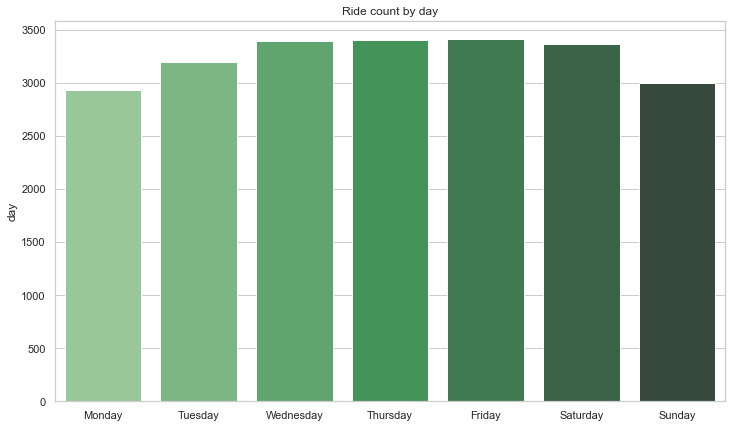

In [198]:
#Create a bar plot of total rides per day
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(daily_rides))
ax = sns.barplot(x = daily_rides.index, y = daily_rides, palette = pal)
ax.set_xticklabels(day_order)
plt.title('Ride count by day');

#### Total revenue per day

In [199]:
#Repeat the process, this time for total revenue for day
total_amount_day = df0.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index = day_order)
total_amount_day

,total_amount
day,
Monday,48374.08
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


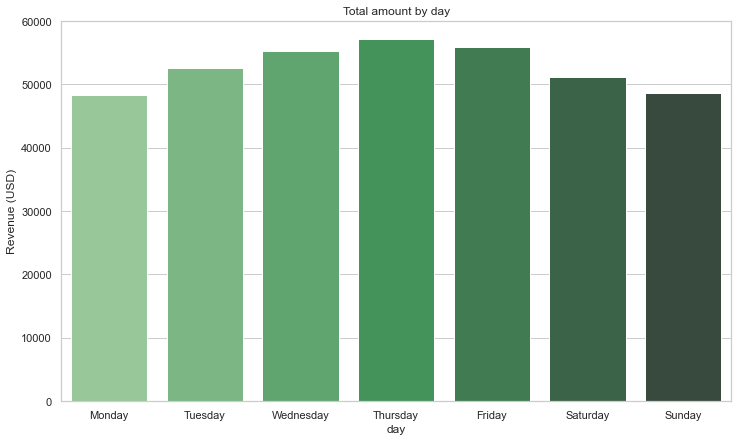

In [200]:
#Create a bar plot of total rides per day
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(total_amount_day))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day['total_amount'], palette = pal)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total amount by day');

#### Total revenue per month

In [201]:
#Repeat the process, this time for total revenue by month
total_amount_month = df0.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index = month_order)
total_amount_month


,total_amount
month,
January,31735.25
February,27737.60
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
September,28206.38
October,33065.83


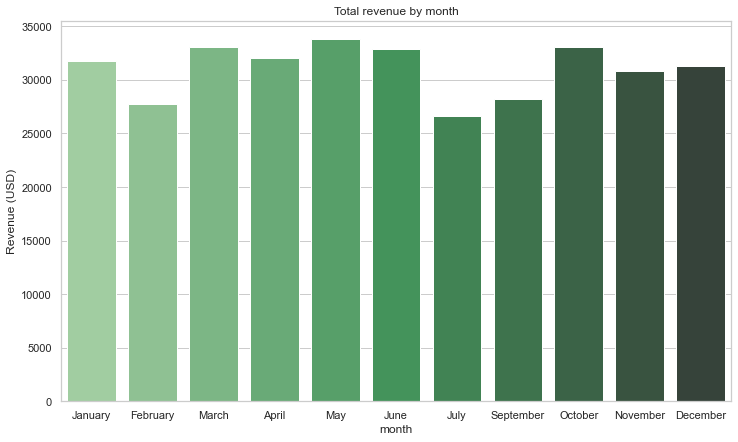

In [202]:
#bar plot
plt.figure(figsize = (12,7))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month['total_amount'], palette = 'Greens_d')
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by month');

In [203]:
#Create pickup_droppoff column
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)
df0['pickup_dropoff'].head(3)

0    100 231
1     186 43
2    262 236
Name: pickup_dropoff, dtype: object

In [204]:
grouped = df0.groupby('pickup_dropoff')[['trip_distance']].mean(numeric_only = True)
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [205]:
grouped_dict = grouped.to_dict()

grouped_dict = grouped_dict['trip_distance']

In [206]:
df0['mean_distance'] = df0['pickup_dropoff']

df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

df0[(df0['PULocationID'] == 100) & (df0['DOLocationID'] == 231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

In [207]:
grouped = df0.groupby('pickup_dropoff')[['duration']].mean(numeric_only = True)
grouped

grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

df0[(df0['PULocationID'] == 100) & (df0['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `rush_hour` column

In [208]:
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

df0.loc[df0['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0

In [209]:
def rush_horizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else: 
        val = 0
    return val

In [210]:
df0.loc[(df0.day != 'Saturday') & (df0.day != 'Sunday'), 'rush_hour'] = df0.apply(rush_horizer, axis = 1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,March,Saturday,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,April,Tuesday,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,December,Friday,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,May,Sunday,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,April,Saturday,4 112,4.435000,14.616667,0


In [211]:
df0['rush_hour'].value_counts()

0    15962
1     6736
Name: rush_hour, dtype: int64

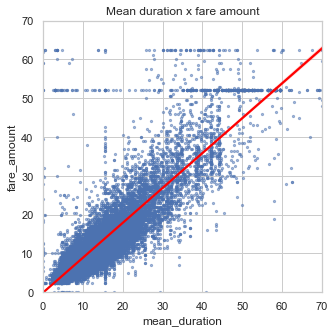

In [212]:
#Create a scatter plot to visualize the relationship between variables of interest
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x = df0['mean_duration'], y = df0['fare_amount'],
            scatter_kws = {'alpha':0.5, 's':5},
            line_kws = {'color':'red'})
plt.ylim(0,70)
plt.xlim(0,70)
plt.title('Mean duration x fare amount');

In [213]:
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     83
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [214]:
df0[df0['fare_amount'] > 50].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,March,Sunday,236 132,19.211667,40.500000,0
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,1,62.5,0.0,0.0,12.00,16.26,0.3,96.81,47.816667,October,Wednesday,138 265,20.552000,39.376667,0
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,62.5,0.5,0.5,18.56,11.52,0.3,111.38,88.783333,November,Monday,132 23,30.830000,88.783333,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,June,Saturday,132 163,19.229000,52.941667,0
156,104881101,1,2017-12-11 10:21:18,2017-12-11 11:14:57,1,15.60,1,N,138,88,1,51.5,0.0,0.5,11.60,5.76,0.3,69.66,53.650000,December,Monday,138 88,15.393333,64.316667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,November,Saturday,132 132,2.255862,3.021839,0
174,53109134,1,2017-06-22 14:22:05,2017-06-22 16:07:28,1,16.90,1,N,230,219,2,62.5,0.0,0.5,0.00,0.00,0.3,72.30,88.783333,June,Thursday,230 219,16.900000,88.783333,0
176,50046493,2,2017-06-13 20:05:03,2017-06-13 20:42:53,1,18.05,3,N,163,1,2,62.5,0.5,0.0,0.00,10.50,0.3,80.80,37.833333,June,Tuesday,163 1,18.050000,37.833333,0
220,95620783,2,2017-11-11 13:39:55,2017-11-11 14:53:05,1,13.61,1,N,132,181,1,55.0,0.0,0.5,11.16,0.00,0.3,66.96,73.166667,November,Saturday,132 181,17.358571,42.697619,0
242,67332929,2,2017-08-09 08:32:09,2017-08-09 09:31:11,1,15.89,1,N,138,87,1,53.0,0.0,0.5,10.00,5.76,0.3,69.56,59.033333,August,Wednesday,138 87,13.812500,44.284722,1


#### Isolate modelling variables

In [215]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22698 non-null  int64         
 1   VendorID               22698 non-null  int64         
 2   tpep_pickup_datetime   22698 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22698 non-null  datetime64[ns]
 4   passenger_count        22698 non-null  int64         
 5   trip_distance          22698 non-null  float64       
 6   RatecodeID             22698 non-null  int64         
 7   store_and_fwd_flag     22698 non-null  object        
 8   PULocationID           22698 non-null  int64         
 9   DOLocationID           22698 non-null  int64         
 10  payment_type           22698 non-null  int64         
 11  fare_amount            22698 non-null  float64       
 12  extra                  22698 non-null  float64       
 13  m

In [216]:
df1 = df0.copy()

df1 = df1.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22698 non-null  int64  
 1   passenger_count  22698 non-null  int64  
 2   fare_amount      22698 non-null  float64
 3   mean_distance    22698 non-null  float64
 4   mean_duration    22698 non-null  float64
 5   rush_hour        22698 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


In [217]:
df1.head(10)

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0
5,2,6,9.0,2.052258,11.855376,0
6,2,1,47.5,12.830000,59.633333,1
7,2,1,16.0,4.022500,26.437500,1
8,2,1,9.0,1.019259,7.873457,0
9,1,1,13.0,1.580000,10.541111,0


#### Pair plot

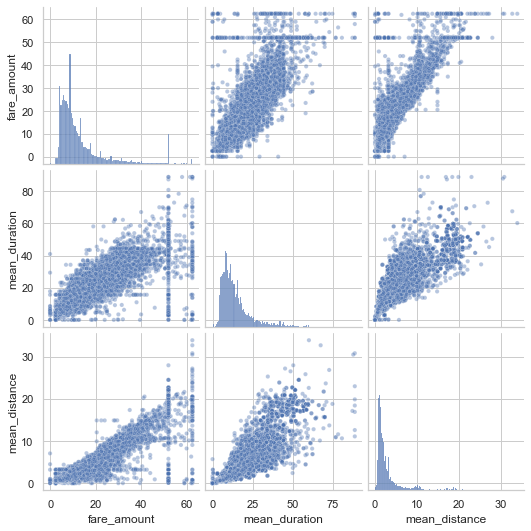

In [218]:
sns.pairplot(df1[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws = {'alpha':0.4, 'size':5});

#### Identify correlations

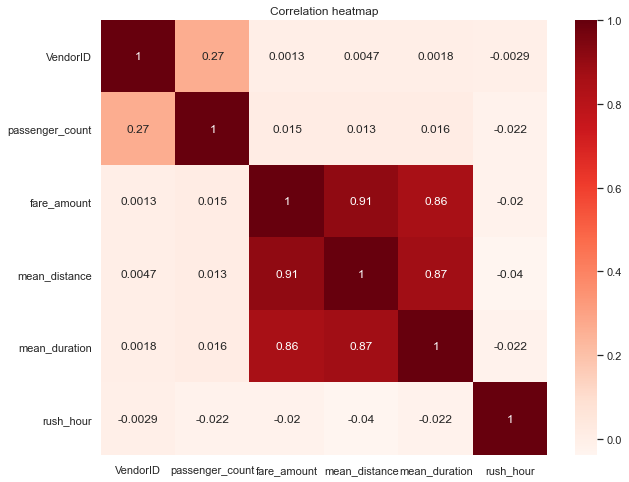

In [219]:
#Create a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(method = 'pearson'), annot = True, cmap = 'Reds')
plt.title('Correlation heatmap');

#### Split data into outcome variable and features

In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22698 non-null  int64  
 1   passenger_count  22698 non-null  int64  
 2   fare_amount      22698 non-null  float64
 3   mean_distance    22698 non-null  float64
 4   mean_duration    22698 non-null  float64
 5   rush_hour        22698 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


In [221]:
#Set the X and y variables
X = df1.drop(columns=['fare_amount'])

y = df1[['fare_amount']]

X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


#### Pre-process data

In [222]:
X['VendorID'] = X['VendorID'].astype(str)

X = pd.get_dummies(X, drop_first= True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [223]:
#Create training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [224]:
#Standarize the X variable
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_Train_scaled', X_train_scaled)

X_Train_scaled [[-0.50009796  0.86324317  0.17440312 -0.65041583  0.89131705]
 [-0.50009796 -0.60014874 -0.69886017  1.53747795  0.89131705]
 [-0.50009796 -0.6165769  -0.92641125 -0.65041583 -1.12193522]
 ...
 [-0.50009796 -0.51620798 -0.74217315  1.53747795 -1.12193522]
 [ 0.27504321 -0.6044572  -0.95805142 -0.65041583  0.89131705]
 [ 1.82532554  0.83065113  1.12904647 -0.65041583  0.89131705]]


In [225]:
#fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [226]:
#Train data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8488052091319851
R^2: 0.8488052091319851
MAE: 2.1656641943039814
MSE: 16.91517180463811
RMSE: 4.112805831137438


In [227]:
#Test the data
X_test_scaled = scaler.transform(X_test)

In [228]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.83706161345431
R^2: 0.83706161345431
MAE: 2.1798794118492726
MSE: 17.52054885237039
RMSE: 4.185755469729496


In [229]:
X_scaled = scaler.transform(X)
r_sq_test = lr.score(X_scaled, y)
print('Coefficient of determination:', r_sq_test)
y_pred_total = lr.predict(X_scaled)
print('R^2:', r2_score(y, y_pred_total))
print('MAE:', mean_absolute_error(y, y_pred_total))
print('MSE:', mean_squared_error(y, y_pred_total))
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred_total)))

Coefficient of determination: 0.8465301189878784
R^2: 0.8465301189878784
MAE: 2.168507488323526
MSE: 17.036257882561475
RMSE: 4.127500197766376


#### Results

In [230]:
#Create a results dataframe
results = pd.DataFrame(data = {'actual':y_test['fare_amount'],
                               'predicted': y_pred_test.ravel(),})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.349796,1.650204
18134,28.0,16.322276,11.677724
4655,5.5,6.703537,-1.203537
7378,15.5,16.228030,-0.728030
19027,42.0,36.616486,5.383514


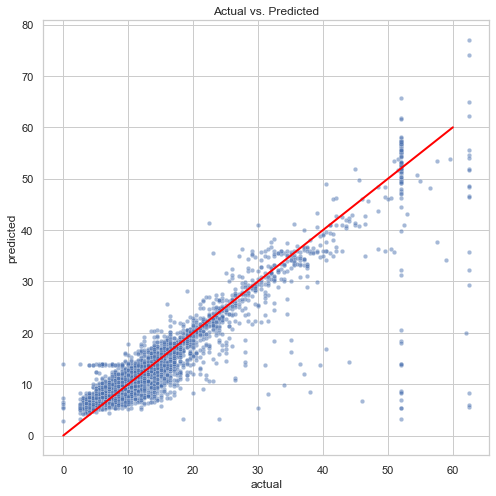

In [231]:
#Create a scatterplot to visualize predicted over actual
fig, ax = plt.subplots(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'actual',
                y = 'predicted',
                data = results,
                s = 20,
                alpha = 0.5,
                ax = ax)
plt.plot([0,60],[0,60], c = 'red', linewidth = 2)
plt.title('Actual vs. Predicted');

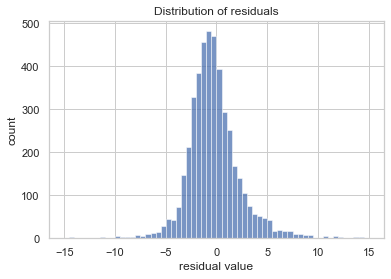

In [232]:
#Visualize the distribution of residulas
sns.histplot(results['residual'], bins = np.arange(-15.0,15.5,0.5))
plt.title('Distribution of residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [233]:
#residual mean
results['residual'].mean()

0.03402985446490014

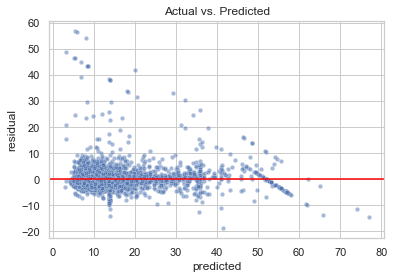

In [234]:
#Create a scatterplot of residuals over predicted
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'predicted',
                y = 'residual',
                data = results,
                s = 20,
                alpha = 0.5)
plt.axhline(0, c = 'red')
plt.title('Actual vs. Predicted');

In [235]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.027462,7.174878,2.829151,0.11905,-0.041875


### Hypothesis Test

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



In [236]:
df0.groupby('payment_type')[['fare_amount']].mean()

,fare_amount
payment_type,
1,13.275956
2,12.105683
3,12.343140
4,12.989130


$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

You choose 5% as the significance level and proceed with a two-sample t-test.

In [237]:
#hypothesis A/B test

credit_card = df0[df0['payment_type'] == 1]['fare_amount']
cash = df0[df0['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a = credit_card, b = cash, equal_var=False)

Ttest_indResult(statistic=7.975947603846438, pvalue=1.6208506504759777e-15)

## Course 6: Machine Learning

In [238]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,March,Saturday,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,April,Tuesday,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,December,Friday,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,May,Sunday,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,April,Saturday,4 112,4.435000,14.616667,0


In [239]:
nyc_pred_means = pd.read_csv('nyc_preds_means.csv')
nyc_pred_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


In [240]:
predicted_fare = nyc_pred_means['predicted_fare']

In [241]:
df0 = df0.merge(predicted_fare,
                left_index=True,
                right_index=True)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour,predicted_fare
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,March,Saturday,100 231,3.521667,22.847222,0,16.434245
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,April,Tuesday,186 43,3.108889,24.470370,0,16.052218
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,December,Friday,262 236,0.881429,7.250000,1,7.053706
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,May,Sunday,188 97,3.700000,30.250000,0,18.731650
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,April,Saturday,4 112,4.435000,14.616667,0,15.845642


In [242]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22698
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22698 non-null  int64         
 1   VendorID               22698 non-null  int64         
 2   tpep_pickup_datetime   22698 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22698 non-null  datetime64[ns]
 4   passenger_count        22698 non-null  int64         
 5   trip_distance          22698 non-null  float64       
 6   RatecodeID             22698 non-null  int64         
 7   store_and_fwd_flag     22698 non-null  object        
 8   PULocationID           22698 non-null  int64         
 9   DOLocationID           22698 non-null  int64         
 10  payment_type           22698 non-null  int64         
 11  fare_amount            22698 non-null  float64       
 12  extra                  22698 non-null  float64       
 13  m

In [243]:
df_cash_card = df0.copy()

df_cash_card = df_cash_card[(df_cash_card['payment_type'] == 1) | (df_cash_card['payment_type'] == 2)]

In [244]:
df_cash_card['tip_percent'] = round(df_cash_card['tip_amount']/(df_cash_card['total_amount'] - df_cash_card['tip_amount']), 3)

In [245]:
#create generous column
df_cash_card['generous'] = df_cash_card['tip_percent']
df_cash_card['generous'] = (df_cash_card['tip_percent'] > 0.20)
df_cash_card['generous'] = df_cash_card['generous'].astype(int)
df_cash_card.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour,predicted_fare,tip_percent,generous
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,March,Saturday,100 231,3.521667,22.847222,0,16.434245,0.200,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,April,Tuesday,186 43,3.108889,24.470370,0,16.052218,0.238,1
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,December,Friday,262 236,0.881429,7.250000,1,7.053706,0.199,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,May,Sunday,188 97,3.700000,30.250000,0,18.731650,0.300,1
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,April,Saturday,4 112,4.435000,14.616667,0,15.845642,0.000,0


In [246]:
#Creat time of day columns
df_cash_card['am_rush'] = df_cash_card['tpep_pickup_datetime'].dt.hour
df_cash_card['daytime'] = df_cash_card['tpep_pickup_datetime'].dt.hour
df_cash_card['pm_rush'] = df_cash_card['tpep_pickup_datetime'].dt.hour
df_cash_card['nighttime'] = df_cash_card['tpep_pickup_datetime'].dt.hour
df_cash_card.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour,predicted_fare,tip_percent,generous,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,March,Saturday,100 231,3.521667,22.847222,0,16.434245,0.200,0,8,8,8,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,April,Tuesday,186 43,3.108889,24.470370,0,16.052218,0.238,1,14,14,14,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,December,Friday,262 236,0.881429,7.250000,1,7.053706,0.199,0,7,7,7,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,May,Sunday,188 97,3.700000,30.250000,0,18.731650,0.300,1,13,13,13,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,April,Saturday,4 112,4.435000,14.616667,0,15.845642,0.000,0,23,23,23,23


In [247]:
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else: 
        val = 0
    return val

In [248]:
df_cash_card['am_rush'] = df_cash_card.apply(am_rush, axis = 1)
df_cash_card['am_rush'].head()

0    1
1    0
2    1
3    0
4    0
Name: am_rush, dtype: int64

In [249]:
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else: 
        val = 0
    return val

In [250]:
df_cash_card['daytime'] = df_cash_card.apply(daytime, axis = 1)
df_cash_card['daytime'].head()

0    0
1    1
2    0
3    1
4    0
Name: daytime, dtype: int64

In [251]:
def pmrush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [252]:
df_cash_card['pm_rush'] = df_cash_card.apply(pmrush, axis = 1)
df_cash_card['pm_rush'].head()

0    0
1    0
2    0
3    0
4    0
Name: pm_rush, dtype: int64

In [253]:
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val
         


In [254]:
df_cash_card['nighttime'] = df_cash_card.apply(nighttime, axis = 1)
df_cash_card['nighttime'].head()

0    0
1    0
2    0
3    0
4    1
Name: nighttime, dtype: int64

In [255]:
#Drop useless columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
            'trip_distance', 'store_and_fwd_flag', 'pickup_dropoff',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'duration', 'rush_hour', 'tip_percent']

df2 = df_cash_card.drop(drop_cols, axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22531 entries, 0 to 22698
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22531 non-null  int64  
 1   passenger_count  22531 non-null  int64  
 2   RatecodeID       22531 non-null  int64  
 3   PULocationID     22531 non-null  int64  
 4   DOLocationID     22531 non-null  int64  
 5   payment_type     22531 non-null  int64  
 6   month            22531 non-null  object 
 7   day              22531 non-null  object 
 8   mean_distance    22531 non-null  float64
 9   mean_duration    22531 non-null  float64
 10  predicted_fare   22531 non-null  float64
 11  generous         22531 non-null  int32  
 12  am_rush          22531 non-null  int64  
 13  daytime          22531 non-null  int64  
 14  pm_rush          22531 non-null  int64  
 15  nighttime        22531 non-null  int64  
dtypes: float64(3), int32(1), int64(10), object(2)
memory usage

In [256]:
df2.groupby('payment_type')[['generous']].sum()

,generous
payment_type,
1,3061
2,0


In [257]:
df2 = df2[(df2['payment_type'] == 1)]

In [258]:
drop_cols = ['payment_type']
df2 = df2.drop(drop_cols, axis = 1)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15264 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15264 non-null  int64  
 1   passenger_count  15264 non-null  int64  
 2   RatecodeID       15264 non-null  int64  
 3   PULocationID     15264 non-null  int64  
 4   DOLocationID     15264 non-null  int64  
 5   month            15264 non-null  object 
 6   day              15264 non-null  object 
 7   mean_distance    15264 non-null  float64
 8   mean_duration    15264 non-null  float64
 9   predicted_fare   15264 non-null  float64
 10  generous         15264 non-null  int32  
 11  am_rush          15264 non-null  int64  
 12  daytime          15264 non-null  int64  
 13  pm_rush          15264 non-null  int64  
 14  nighttime        15264 non-null  int64  
dtypes: float64(3), int32(1), int64(9), object(2)
memory usage: 1.8+ MB


In [259]:
df2['generous'].value_counts(normalize = True)

0    0.799463
1    0.200537
Name: generous, dtype: float64

### Modeling 

In [260]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID']

# 2. Convert each column to string
for col in cols_to_str:
    df2[col] = df2[col].astype('str')

In [261]:
df2_dummies = pd.get_dummies(df2, drop_first=True)
df2_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15264 entries, 0 to 22698
Columns: 347 entries, VendorID to day_Wednesday
dtypes: float64(3), int32(1), int64(6), uint8(337)
memory usage: 6.1 MB


In [262]:
y = df2_dummies['generous']

X = df2_dummies.drop(columns= ['generous'])

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [264]:
rf = RandomForestClassifier(random_state=42)

In [265]:
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv = 4, refit = 'f1')

In [266]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring={'recall', 'f1', 'accuracy', 'precision'})

In [267]:
path = r"C:\Users\Usuario\Desktop\Projectos GitHub\Project_2"

In [268]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [269]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [270]:
write_pickle(path, rf1, save_name='Modelo_random_forest')

In [271]:
rf1.best_score_

0.05623771174529553

In [272]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [273]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [274]:
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.217117,0.032352,0.056238,0.783064


In [275]:
rf_preds = rf1.best_estimator_.predict(X_test)

In [276]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [277]:
 # Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.217117,0.032352,0.056238,0.783064
0,RF test,0.252427,0.042003,0.072022,0.780544


In [278]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [279]:
xgb1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [280]:
xgb1.best_score_

0.09395857844845046

In [281]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [282]:
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis = 0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.217117,0.032352,0.056238,0.783064
0,RF test,0.252427,0.042003,0.072022,0.780544
0,XGB CV,0.244933,0.058150,0.093959,0.775694


In [283]:
xgb1_preds = xgb1.best_estimator_.predict(X_test)

In [284]:
xgb_test_scores = get_test_scores('XGB test', xgb1_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.217117,0.032352,0.056238,0.783064
0,RF test,0.252427,0.042003,0.072022,0.780544
0,XGB CV,0.244933,0.058150,0.093959,0.775694
0,XGB test,0.196581,0.037157,0.062500,0.773993


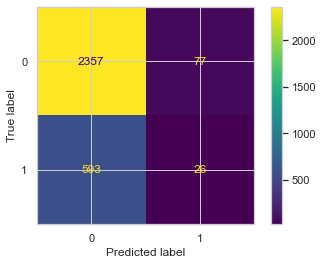

In [285]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels = rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf1.classes_)
disp.plot(values_format = '');

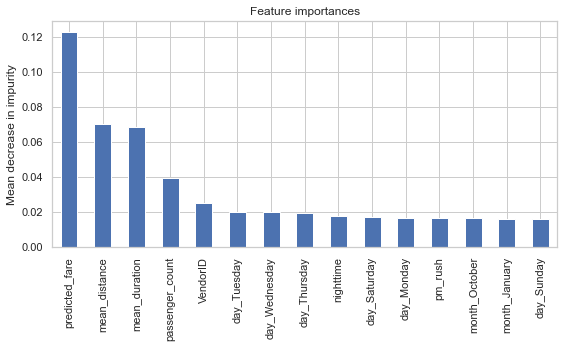

In [286]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();